In [6]:
pip install soundfile

Note: you may need to restart the kernel to use updated packages.


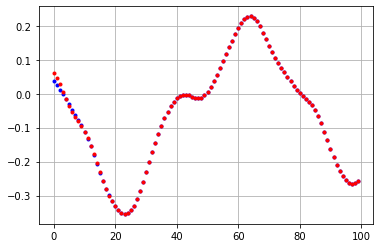

In [7]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:

#
import soundfile as sf
from scipy import signal, fft
import numpy as np
from numpy.polynomial import Polynomial as P
from matplotlib import pyplot as plt

def myfiltfilt(b, a, input_signal):
    X = fft.fft(input_signal)
    w = np.linspace(0, 1, len(X) + 1)
    W = np.exp(2j*np.pi*w[:-1])
    B = (np.absolute(np.polyval(b,W)))**2
    A = (np.absolute(np.polyval(a,W)))**2
    Y = B*(1/A)*X
    return fft.ifft(Y).real

#read .wav file 
input_signal,fs = sf.read('Sound_Noise.wav') 

#sampling frequency of Input signal
sampl_freq=fs

#order of the filter
order=4   

#cutoff frquency 4kHz
cutoff_freq=4000.0  

#digital frequency
Wn=2*cutoff_freq/sampl_freq  

# b and a are numerator and denominator polynomials respectively
b, a = signal.butter(order, Wn, 'low') 

#filter the input signal with butterworth filter
output_signal = signal.filtfilt(b, a, input_signal)
#output_signal1 = signal.lfilter(b, a, input_signal)
os1 = myfiltfilt(b, a, input_signal)
x_plt = np.arange(len(input_signal))
#Verify outputs by plotting
plt.plot(x_plt[:100], output_signal[:100], 'b.')
plt.plot(x_plt[:100], os1[:100], 'r.')
plt.grid()
plt.show()


# %%
